#한국어 vectorizing

자연어를 좌표평면 위에 나열하는 법을 실습합니다.


*   Word2Vec
*   FastText



In [6]:
!pip install gensim==4.2.0
!python -m pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=1V4rTx4yaAg0x1NY1MpNRY2Dp1nKeyOQ7" > /dev/null
!curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=1V4rTx4yaAg0x1NY1MpNRY2Dp1nKeyOQ7" -o wiki_20190620_small.txt
!mkdir data
!mv wiki_20190620_small.txt data/

awk: cannot open ./cookie (No such file or directory)
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
100 75.1M  100 75.1M    0     0  30.2M      0  0:00:02  0:00:02 --:--:--  282M
mkdir: cannot create directory ‘data’: File exists


## 0) Prepare dataset

In [8]:
## 1.1) read text data
# 한국어 위키 데이터 load
with open('./data/wiki_20190620_small.txt', 'r', encoding='utf-8') as f:
    lines = f.readlines()
    print(lines[:2])

    # '\n' 제거
    lines_wiki = [tmp.strip() for tmp in lines]
    print('\n  => ', lines[:2])

['제임스 얼 " 지미 " 카터 주니어 는 민주당 출신 미국 39 번 째 대통령 이 다 . \n', '지미 카터 는 조지아주 섬터 카운티 플레인스 마을 에서 태어났 다 . \n']

  =>  ['제임스 얼 " 지미 " 카터 주니어 는 민주당 출신 미국 39 번 째 대통령 이 다 . \n', '지미 카터 는 조지아주 섬터 카운티 플레인스 마을 에서 태어났 다 . \n']


In [9]:
# 형태서 단위로 분절, 23min
from konlpy.tag import Okt
from tqdm import tqdm
okt = Okt()

stop_words = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# lines_wiki_morph = []
# for tmp in tqdm(lines_wiki[:1000]):
# # for tmp in tqdm(lines_wiki):
    
#     list_token = okt.morphs(tmp)
#     lines_wiki_morph = [word for word in list_token if not word in stop_words] 

    
# lines_wiki_morph = list(map(lambda s: list(okt.morphs(s)), lines_wiki[:10000]))
lines_wiki_morph = list(map(lambda s: list(okt.morphs(s)), lines_wiki))

## 0) 간단한 실습

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  from ipykernel import kernelapp as app


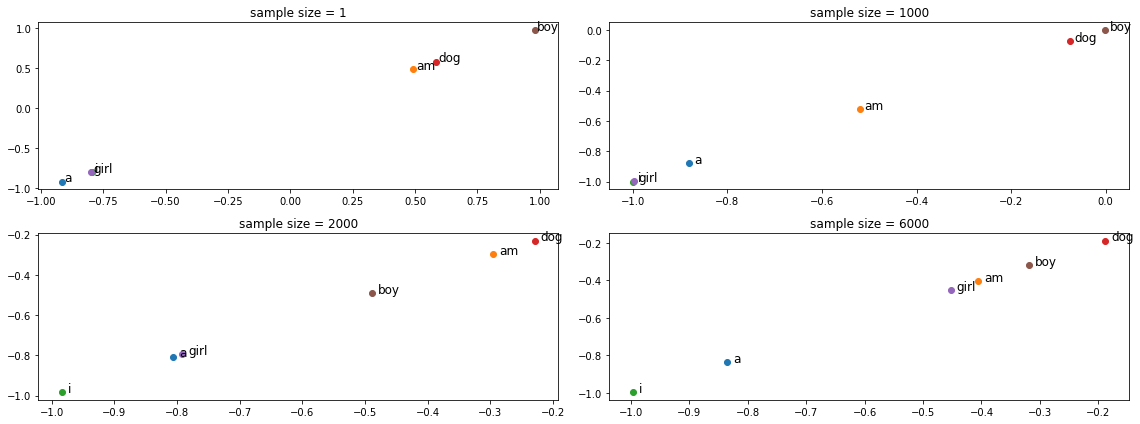

In [10]:
## 1) word2vec 실습
# https://frhyme.github.io/python-lib/nlp_vector/
from gensim.models.word2vec import Word2Vec
import matplotlib.pyplot as plt

f, axes = plt.subplots(2, 2, sharex=False, sharey=False)
f.set_size_inches((16, 6)) 
for i in range(0, 2):
    for j in range(0, 2):
        sample_n = [1, 1000, 2000, 6000][i*2+j]
        sent_lst = ["I am a boy", "I am a girl", "I am a dog"]*sample_n
        sent_split_lst = map(lambda s: list(s.lower().split(" ")), sent_lst)

        model = Word2Vec(list(sent_split_lst), vector_size=2, window = 3, min_count=1)
        model.init_sims(replace=True)# 학습 완료 후, 필요없는 메모리 삭제 

        for x, y, t in ((model.wv.get_vector(w)[0], model.wv.get_vector(w)[0], w) for w in model.wv.index_to_key):
            axes[i][j].scatter(x, y, cmap=plt.cm.rainbow)
            axes[i][j].text(x+0.01, y, t, fontsize=12)
            axes[i][j].set_title("sample size = {}".format(sample_n))
f.tight_layout()# 그냥 이걸로 다 해결되었다.
plt.savefig('word_embedding_subplot_220527.svg')
plt.show()

## 1) train word2vec

In [11]:
from gensim.models.word2vec import Word2Vec

model_w2v = Word2Vec(lines_wiki_morph, vector_size=50, window = 5, min_count=10)
model_w2v.init_sims(replace=True)# 학습 완료 후, 필요없는 메모리 삭제 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  after removing the cwd from sys.path.


In [12]:
vocabs = model_w2v.wv.index_to_key
print(vocabs[:100])

['.', '다', '의', '이', '는', ',', '에', '을', '하', '은', '를', '한', '고', '가', '있', '으로', '에서', '년', '되', '로', '었', '들', '과', '였', '했', '도', '적', '와', '인', '그', '기', '것', '월', '된', '지', '어', '게', '일', '여', '수', '"', '등', "'", '1', '해', '으며', '며', '2', '던', '할', '서', '자', '3', '않', '만', '았', '성', '에게', '-', '때', '·', '까지', '받', '중', '주', '제', '세', '4', '명', '라고', '면', '라는', '지만', '대', '는데', '5', '아', '다고', '이후', '없', '면서', '으나', '다는', '같', '개', '사용', '위', '부터', '두', '나', '후', '지역', '라', '많', '미국', '때문', '일본', '말', '대한', '전']


In [13]:
model_w2v.save('w2v_model')
saved_model_w2v = Word2Vec.load('w2v_model')

In [14]:
saved_model_w2v.wv['이순신']

array([-0.09069695,  0.05213527, -0.04826991, -0.07579015, -0.15667671,
       -0.06096543,  0.19858845,  0.15356252, -0.12740041, -0.00627539,
        0.00692626,  0.03615111,  0.03501377,  0.34350199, -0.24440192,
       -0.23272716,  0.01410124, -0.00720403, -0.2257743 ,  0.01962542,
        0.11834422,  0.00861288,  0.05321943, -0.060807  ,  0.06543067,
       -0.08315798, -0.131428  , -0.01030659, -0.24258709,  0.03308367,
       -0.22581364,  0.10330817, -0.29773876, -0.09942336,  0.21006529,
        0.20423074,  0.15202188, -0.13145243, -0.00819538,  0.0136234 ,
       -0.07294616, -0.2645808 , -0.03243195, -0.06711995,  0.03371099,
        0.24536589,  0.07725797,  0.05031949, -0.11659153, -0.1650046 ],
      dtype=float32)

In [15]:
print('## 이순신과 가까운 단어\n', saved_model_w2v.wv.most_similar(positive=["이순신"], topn=10))
print('\n## 이순신<->이명박: %.2f'%saved_model_w2v.wv.similarity('이순신', '이명박'))
print('\n## 이순신<->원  균: %.2f'%saved_model_w2v.wv.similarity('이순신', '원균'))
print('\n## 대한민국-서울+베이징\n=> ', saved_model_w2v.wv.most_similar(positive=['대한민국', '베이징'], negative=['서울']))
print('\n## 영국과 가까운 단어\n', saved_model_w2v.wv.similar_by_word('영국'))

## 이순신과 가까운 단어
 [('원균', 0.847652792930603), ('수군', 0.7719423770904541), ('최영', 0.763788104057312), ('김유신', 0.7518765926361084), ('계략', 0.7403256893157959), ('왕건', 0.7278620004653931), ('연개소문', 0.7171447277069092), ('제갈량', 0.7141541838645935), ('김부식', 0.7126466631889343), ('견훤', 0.7097271084785461)]

## 이순신<->이명박: 0.10

## 이순신<->원  균: 0.85

## 대한민국-서울+베이징
=>  [('중화민국', 0.7893625497817993), ('중화인민공화국', 0.7794374227523804), ('베트남', 0.7400386929512024), ('일본', 0.7344449162483215), ('조선민주주의인민공화국', 0.7331362366676331), ('중국', 0.7118562459945679), ('러시아', 0.6881078481674194), ('대만', 0.6875410079956055), ('이스라엘', 0.683338463306427), ('필리핀', 0.6772626042366028)]

## 영국과 가까운 단어
 [('프랑스', 0.8846070170402527), ('독일', 0.8481327891349792), ('네덜란드', 0.8338569402694702), ('스페인', 0.8252941370010376), ('미국', 0.8154518604278564), ('스웨덴', 0.7919657230377197), ('포르투갈', 0.7691243886947632), ('러시아', 0.7557358741760254), ('노르웨이', 0.7504591345787048), ('대영제국', 0.7483952045440674)]


## 2) FastText 학습

In [16]:
from gensim.models.fasttext import FastText
import gensim.models.word2vec

In [17]:
model_fasttext = FastText(lines_wiki_morph, vector_size=50, window = 5, min_count=10)
model_fasttext.init_sims(replace=True)# 학습 완료 후, 필요없는 메모리 삭제 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  


In [18]:
model_fasttext.save('fasttext_model')
saved_model_fasttext = FastText.load('fasttext_model')

In [19]:
print('## 이순신과 가까운 단어\n', saved_model_fasttext.wv.most_similar(positive=["이순신"], topn=10))
print('\n## 이순신<->이명박: %.2f'%saved_model_fasttext.wv.similarity('이순신', '이명박'))
print('\n## 이순신<->원  균: %.2f'%saved_model_fasttext.wv.similarity('이순신', '원균'))
print('\n## 대한민국-서울+베이징\n=> ', saved_model_fasttext.wv.most_similar(positive=['대한민국', '베이징'], negative=['서울']))
print('\n## 영국과 가까운 단어\n', saved_model_fasttext.wv.similar_by_word('영국'))

## 이순신과 가까운 단어
 [('군', 10.144164085388184), ('씨', 9.313223838806152), ('왕', 9.10566520690918), ('병', 8.02184009552002), ('장군', 7.737173080444336), ('함', 7.680090427398682), ('조선', 7.632279396057129), ('《', 7.604093074798584), ('고종', 7.5664215087890625), ('전투', 7.462076663970947)]

## 이순신<->이명박: 0.07

## 이순신<->원  균: 0.83

## 대한민국-서울+베이징
=>  [('적', 11.557185173034668), ('론', 8.17136287689209), ('독일', 7.819032192230225), ('족', 7.8113274574279785), ('많', 7.352581977844238), ('들', 7.1035261154174805), ('영국', 7.084288597106934), ('전쟁', 7.064088821411133), ('받', 6.733620643615723), ('화', 6.642155647277832)]

## 영국과 가까운 단어
 [('받', 11.037919998168945), ('미국', 10.553934097290039), ('조약', 10.54643726348877), ('독일', 9.989163398742676), ('섬', 9.667634963989258), ('유럽', 9.460180282592773), ('전쟁', 9.397361755371094), ('령', 9.228996276855469), ('주', 8.839669227600098), ('맺', 8.633912086486816)]


In [20]:
word_vector = saved_model_fasttext.wv['이순신']
print(word_vector)

[ 2.5234529e-01 -1.1634414e+00  9.8395813e-01 -5.1066560e-01
  2.4469550e-01 -3.3012295e-01 -8.0669159e-01  1.7077715e+00
  3.6407217e-01 -2.6824063e-01 -1.1800690e+00  1.1162051e+00
  9.2967933e-01  2.3492347e-01 -2.7449331e-01 -2.4737842e-01
 -1.3649741e-01  5.5512679e-01 -1.2324209e+00  1.5853641e+00
 -7.8429587e-02 -3.5836378e-01  1.2687370e+00 -5.4174459e-01
 -8.2940543e-01 -9.8945421e-01  4.7231314e-01  1.0334009e+00
  1.5543917e-01 -1.1197838e+00 -2.4302064e-04 -5.0968355e-01
 -1.2316911e+00  4.2819422e-01  1.0175624e+00  5.5499631e-01
 -5.9683371e-01 -1.0071896e+00 -2.5340915e-01  5.2348673e-01
 -5.6685930e-01 -1.3908409e-01  1.3118218e+00 -1.8053211e-01
  2.7091036e-02  1.7687333e-01  2.1167459e+00  7.1249074e-01
  5.0146717e-01 -2.0945699e+00]


In [21]:
print('## 이순신과 가까운 단어\n', saved_model_fasttext.wv.most_similar(positive=["이순신"], topn=10))
print('\n## 이순신<->이명박: %.2f'%saved_model_fasttext.wv.similarity('이순신', '이명박'))
print('\n## 이순신<->원  균: %.2f'%saved_model_fasttext.wv.similarity('이순신', '원균'))
print('\n## 대한민국-서울+베이징\n=> ', saved_model_fasttext.wv.most_similar(positive=['대한민국', '베이징'], negative=['서울']))
print('\n## 영국과 가까운 단어\n', saved_model_fasttext.wv.similar_by_word('영국'))

## 이순신과 가까운 단어
 [('군', 10.144164085388184), ('씨', 9.313223838806152), ('왕', 9.10566520690918), ('병', 8.02184009552002), ('장군', 7.737173080444336), ('함', 7.680090427398682), ('조선', 7.632279396057129), ('《', 7.604093074798584), ('고종', 7.5664215087890625), ('전투', 7.462076663970947)]

## 이순신<->이명박: 0.07

## 이순신<->원  균: 0.83

## 대한민국-서울+베이징
=>  [('적', 11.557185173034668), ('론', 8.17136287689209), ('독일', 7.819032192230225), ('족', 7.8113274574279785), ('많', 7.352581977844238), ('들', 7.1035261154174805), ('영국', 7.084288597106934), ('전쟁', 7.064088821411133), ('받', 6.733620643615723), ('화', 6.642155647277832)]

## 영국과 가까운 단어
 [('받', 11.037919998168945), ('미국', 10.553934097290039), ('조약', 10.54643726348877), ('독일', 9.989163398742676), ('섬', 9.667634963989258), ('유럽', 9.460180282592773), ('전쟁', 9.397361755371094), ('령', 9.228996276855469), ('주', 8.839669227600098), ('맺', 8.633912086486816)]


In [22]:
saved_model_fasttext.wv.most_similar(positive=['대한민국', '이탈리아'], negative=['서울'])

[('적', 12.187234878540039),
 ('받', 9.75007152557373),
 ('론', 8.557537078857422),
 ('독일', 8.494512557983398),
 ('제국', 8.384032249450684),
 ('족', 8.359405517578125),
 ('얻', 8.058629035949707),
 ('왕국', 7.79880952835083),
 ('영향', 7.783575534820557),
 ('주의', 7.465984344482422)]

In [23]:
print(saved_model_fasttext.wv.similar_by_word('북한'))

[('측', 14.446197509765625), ('전쟁', 10.709078788757324), ('조약', 10.598675727844238), ('군', 10.43717098236084), ('소련', 10.167313575744629), ('정부', 10.053406715393066), ('국', 9.94519329071045), ('미군', 9.437292098999023), ('핵', 9.430438041687012), ('친', 9.162507057189941)]
